# ¿Cómo trabajar datos sismológicos en cualquier computador?

### Bienvenidas y bienvenidos.

Este taller consta de 3 modulos:

1.   Introducción a python
2.   Descargar datos sismologicos usando Obspy
3.   Analizar sismogramas

Ante cualquier duda o consulta dirigirse a catalina.morales@ucsc.cl

Este taller fue creado por Catalina Morales-Yáñez, para que las y los asistentes pueden comprender y trabajar con datos sismologicos. Si necesita usarlo para algún otro fin por favor consulte previamente.


# OBSPY


> ObsPy es un proyecto de código abierto dedicado a proporcionar un base de trabajo en Python para el procesamiento de datos sismológicos. El código proporciona lectores para diferentes formatos de archivos usados en sismología, además proporciona la conección con diferentes "clientes" para acceder a centros de datos y rutinas de procesamiento de señales sismológicas que permiten la manipulación de series de tiempo sismológicas.



> Este curso les proporcionará las bases necesarias para descargar, trabajar y visualizar datos sismologicos.



En este modulo


1.   Mostraremos los eventos que pueden existir en un área
2.   Escogeremos un terremoto y descargaremos las formas de onda de una de las estaciones.




In [ ]:
# Primero instalamos Obspy
!pip install cartopy
!pip install obspy


#Ojo que si aquí les muestra un warning vuelvan a correr la celda, es un pequeño bug entre collab y obspy


In [ ]:
#Luego creamos una carpeta en nuestro drive para guardar los datos

import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

folder = "/content/drive/My Drive/Borrar_test"

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/Borrar_test"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos lo modulos necesarios
from obspy.core.event import read_events # Obspy event class que permite leer eventos de un catalogo
from obspy.clients.fdsn import Client # obspy class que nos permite escoger el "cliente" de donde descargaremos los datos
from obspy import UTCDateTime # obspy class para leer el tiempo
import matplotlib.pyplot as plt # Modulo para graficar
import pandas as pd #Modulo para el manejo de datos
import numpy as np #Modulo con funciones matemáticas
import obspy #Obspy general
import scipy #Modulo matematico


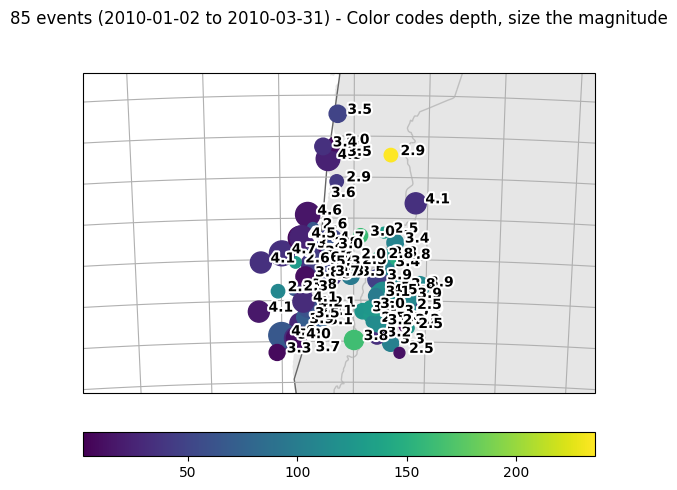

In [ ]:
#Ahora escogemos un cliente, en nuestro caso escogeremos IRIS

client=Client("IRIS")

#Los clientes a los que pueden tener acceso corresponden a

    # BGR     http://eida.bgr.de
    # EMSC    http://www.seismicportal.eu
    # ETH     http://eida.ethz.ch
    # GEONET  http://service.geonet.org.nz
    # GFZ     http://geofon.gfz-potsdam.de
    # ICGC    http://ws.icgc.cat
    # INGV    http://webservices.ingv.it
    # IPGP    http://ws.ipgp.fr
    # IRIS    http://service.iris.edu
    # ISC     http://isc-mirror.iris.washington.edu
    # KNMI    http://rdsa.knmi.nl
    # KOERI   http://eida.koeri.boun.edu.tr
    # LMU     http://erde.geophysik.uni-muenchen.de
    # NCEDC   http://service.ncedc.org
    # NIEP    http://eida-sc3.infp.ro
    # NOA     http://eida.gein.noa.gr
    # ODC     http://www.orfeus-eu.org
    # ORFEUS  http://www.orfeus-eu.org
    # RESIF   http://ws.resif.fr
    # SCEDC   http://service.scedc.caltech.edu
    # TEXNET  http://rtserve.beg.utexas.edu
    # USGS    http://earthquake.usgs.gov
    # USP     http://sismo.iag.usp.br

#Definimos el tiempo de inicio y fin para la busqueda de eventos en nuestro caso buscaremos los eventos relacionados al terremoto del Maule (2010)

starttime =UTCDateTime("2010-01-01T00:00:00")
endtime= UTCDateTime("2010-04-01T00:00:00")

minlat = -30.3
maxlat = -24.4
minlon = -73.3
maxlon = -68.0

events = client.get_events(minlatitude=minlat,maxlatitude=maxlat,
                           minlongitude=minlon,maxlongitude=maxlon,
                           starttime=starttime, endtime=endtime)

events.write(folder+'/events.xml', format='QUAKEML')
#Nota si tienen un error en este comando reinicien el entorno y vuelvan a correr la celda de pip dos veces

events.plot(projection='local'); # the semi-colon is only necessary in jupyter, as it is a quirk about jupyter plotting


In [ ]:
print(events)

85 Event(s) in Catalog:
2010-03-31T12:40:04.500000Z | -30.045,  -68.961 | 3.3  ML
2010-03-31T05:44:37.800000Z | -28.489,  -69.338 | 3.9  ML
...
2010-01-02T08:19:16.300000Z | -28.402,  -70.772 | 3.7  ML
2010-01-02T03:17:35.990000Z | -25.252,  -70.832 | 3.4  mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [ ]:
print(events[0].magnitudes[0].mag)
print(events[0].origins)

3.3
[Origin(resource_id=ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=16464429"), time=UTCDateTime(2010, 3, 31, 12, 40, 4, 500000), longitude=-68.961, latitude=-30.045, depth=103400.0, creation_info=CreationInfo(author='SJA'))]


In [ ]:
# ¿Cómo guardo en un archivo excel?

Encabezado = ['Tiempo de origen (UTC)', 'Lat [°]', 'Lon [°]', 'Prof [m]', 'event_type', 'mag', 'magnitude_type', 'info']
df = pd.DataFrame(0, index=np.arange(len(events)), columns=Encabezado)

for i in range (0, len(events)):
    df.loc[i,'Tiempo de origen (UTC)'] = events[i].origins[0].time
    df.loc[i,'Lat [°]']                = events[i].origins[0].latitude
    df.loc[i,'Lon [°]']                = events[i].origins[0].longitude
    df.loc[i,'Prof [m]']               = float(events[i].origins[0].depth)/1000
    df.loc[i,'event_type']             = events[i].event_type
    df.loc[i,'mag']                    = events[i].magnitudes[0].mag
    df.loc[i,'magnitude_type']         = events[i].magnitudes[0].magnitude_type
    df.loc[i,'info']                   = events[i].event_descriptions[0].text

print(df)
# Guardar en excel
df.to_excel(folder+'/events.xlsx', sheet_name='Events')
print()

         Tiempo de origen (UTC)  Lat [°]  Lon [°]  Prof [m]  event_type  mag  \
0   2010-03-31T12:40:04.500000Z -30.0450 -68.9610     103.4  earthquake  3.3   
1   2010-03-31T05:44:37.800000Z -28.4890 -69.3380      47.0  earthquake  3.9   
2   2010-03-31T04:15:23.980000Z -29.2618 -72.6300      17.0  earthquake  4.1   
3   2010-03-30T22:24:07.200000Z -29.2680 -69.7480     123.7  earthquake  3.2   
4   2010-03-29T12:01:34.500000Z -27.7140 -71.2670     162.4  earthquake  3.2   
..                          ...      ...      ...       ...         ...  ...   
80  2010-01-06T02:11:06.510000Z -27.4692 -71.4243      24.2  earthquake  4.5   
81  2010-01-05T04:49:24.800000Z -28.4190 -71.3290      10.8  earthquake  3.8   
82  2010-01-04T17:12:38.540000Z -28.0660 -72.5515      35.0  earthquake  4.1   
83  2010-01-02T08:19:16.300000Z -28.4020 -70.7720      52.1  earthquake  3.7   
84  2010-01-02T03:17:35.990000Z -25.2520 -70.8317      35.0  earthquake  3.4   

   magnitude_type                      

# Desafío

Copie el código de arriba y grafique los eventos sísmicos del centro de Chile, de este año.

# ¡Ahora descarguemos sismogramas!

Pero antes necesitamos familiarizarnos con algunas nomenclaturas. Los datos siguen esta convención con la que podemos identificar desde dónde viene la data:

**Network code** : identifica la red que quiero usar. Esto se puede chequear de
acuerdo a la disponibilidad de las redes usando el IRIS MetaData Aggregator ([ver aquí](http://ds.iris.edu/mda/)). Los códigos son únicos y asignados por la FDSN. Por ejemplo, la red sismológica nacional (RSN) operada por el CSN desde 2013, está identificado bajo el código C1. Otras estaciones antiguas tienen el código C.

**Station code** : es la estación dentro de esta red. No son necesariamente únicas (a veces se traspapelan) y por eso se identifican también con la red. Por ejemplo, el CSN asigna las estaciones MT** a la Región Metropolitana, MG** a Magallanes, LR** a Los Ríos, BI** a Bío Bío, etc.

**Location ID** : En algunas ocasiones, las etaciones pueden tener más de un instrumento, y eso está especificado con la ID de localización. En mi experiencia no todas siguen este estándar, pero es bueno tenerlo presente.  

**Channel codes** : Siempre son tres caracteres del estilo LHZ.

1. La primera letra da cuenta de la tasa de muestreo: H: 80-250 Hz, B: 10-80 Hz, L: 1 Hz, V: 0.1 Hz
2. La segunda letra da cuenta del tipo de instrumento: H: instrumento banda ancha (high-gain seismometer, con respuesta instrumental proporcional a velocidad), N: acelerómetro (que registra aceleración o también llamado strong-motion, movimiento fuerte)
3. La tercera letra da cuenta de la orientación: N, E, Z y 1,2: horizontales arbitrarias

In [ ]:
#Vamos a descargar un sismograma del terremoto del Maule
# Estación de la Antartida

st = client.get_waveforms(
    network="IU",
    station="PMSA",
    location="*",
    channel="BHZ",
    starttime=obspy.UTCDateTime("2010-02-27T06:35:00"),
    endtime=obspy.UTCDateTime("2010-02-27T07:00:00"),
    attach_response=True,
)

print(st)

1 Trace(s) in Stream:
IU.PMSA.00.BHZ | 2010-02-27T06:35:00.035058Z - 2010-02-27T06:59:59.985058Z | 20.0 Hz, 30000 samples


Notemos que el "Stream" contiene una traza, si queremos extraer/trabajar con ella podemos seleccionarla según la posición donde se encuentre. Una vez seleccionada la traza podemos visualizar la información de esta a travez de stats

In [ ]:
tr = st[0]
tr.stats

               network: IU
               station: PMSA
              location: 00
               channel: BHZ
             starttime: 2010-02-27T06:35:00.035058Z
               endtime: 2010-02-27T06:59:59.985058Z
         sampling_rate: 20.0
                 delta: 0.05
                  npts: 30000
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 168, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 86016})
            processing: ['ObsPy 1.4.0: trim(endtime=UTCDateTime(2010, 2, 27, 6, 59, 59, 985058)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2010, 2, 27, 6, 34, 59, 985058))']
              response: Channel Response
	From m/s (Velocity in Meters Per Second) to counts (Digital Counts)
	Overall Sensitivity: 1.03812e+09 defined at 0.050 Hz
	6 stages:
		Stage 1: PolesZerosRe

In [ ]:
#Stats es un diccionario así que podemos extraer información como de costumbre
tr.stats.station

'PMSA'

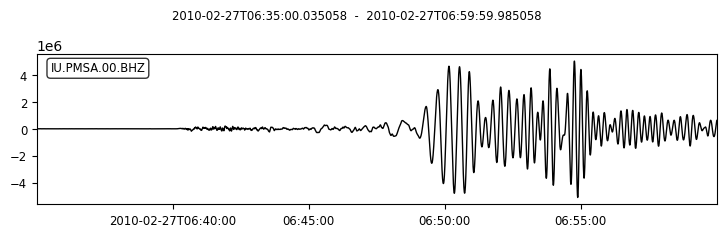

Using matplotlib backend: agg


In [ ]:
#Para graficar simplemente podemos usar el comando asociado a obspy y podremos
#visualizar el sismograma
st.plot()
#Ojo segundo bug de collab y obspy, dos graficos en linea,
#para evitar esto agregamos
%matplotlib

Si queremos agregar más trazas a nuestro Stream simplemente las agregamos como suma de diccionarios

In [ ]:
st2 = client.get_waveforms(
    network="IU",
    station="PMSA",
    location="*",
    channel="BHE",
    starttime=obspy.UTCDateTime("2010-02-27T06:35:00"),
    endtime=obspy.UTCDateTime("2010-02-27T07:00:00"),
    attach_response=True,
)

st3 = client.get_waveforms(
    network="IU",
    station="PMSA",
    location="*",
    channel="BHN",
    starttime=obspy.UTCDateTime("2010-02-27T06:35:00"),
    endtime=obspy.UTCDateTime("2010-02-27T07:00:00"),
    attach_response=True,
)


3 Trace(s) in Stream:
IU.PMSA.00.BHZ | 2010-02-27T06:35:00.035058Z - 2010-02-27T06:59:59.985058Z | 20.0 Hz, 30000 samples
IU.PMSA.00.BHE | 2010-02-27T06:35:00.035058Z - 2010-02-27T06:59:59.985058Z | 20.0 Hz, 30000 samples
IU.PMSA.00.BHN | 2010-02-27T06:35:00.035058Z - 2010-02-27T06:59:59.985058Z | 20.0 Hz, 30000 samples


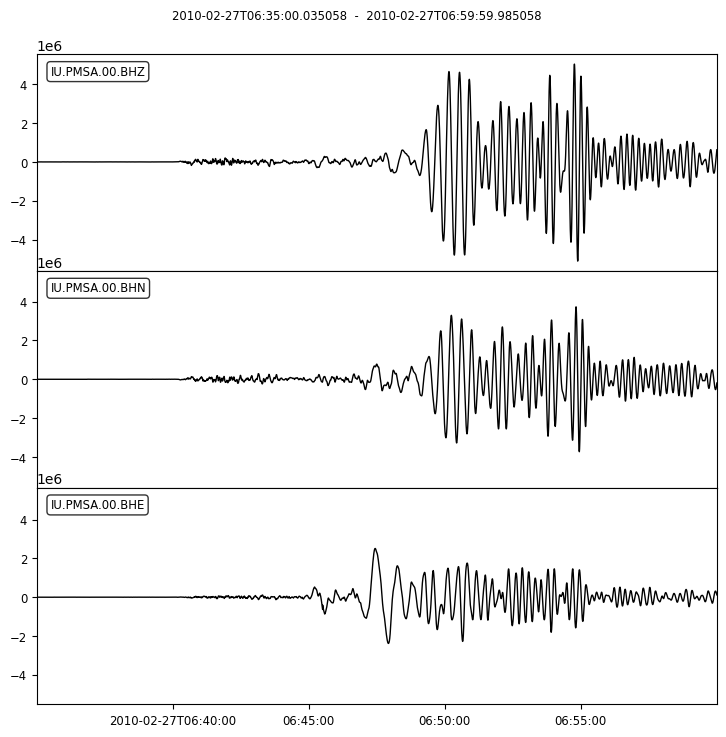

In [ ]:
Ttr = st + st2 + st3
print(Ttr)
Ttr.plot()

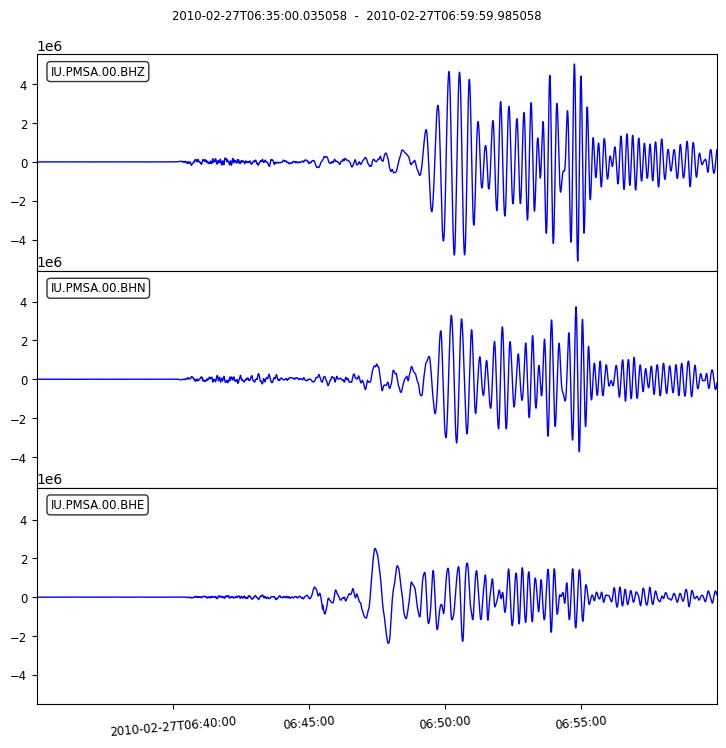

In [ ]:
#Ahora si deseamos cambiar el color o amononar nuestros graficos podemos hacerlo directamente usando
Ttr.plot(color='blue', tick_rotation=5, tick_format='%I:%M %p')


In [ ]:
#Si queremos guardar en nuestro drive usamos ....
Ttr.plot(color='blue', tick_rotation=5, tick_format='%I:%M %p',outfile='/content/drive/My Drive/Borrar_test/blue.png')

Otra de las particularidades de Obspy es que tambien podemos descargar datos de días completos y graficarlos como plot diarios

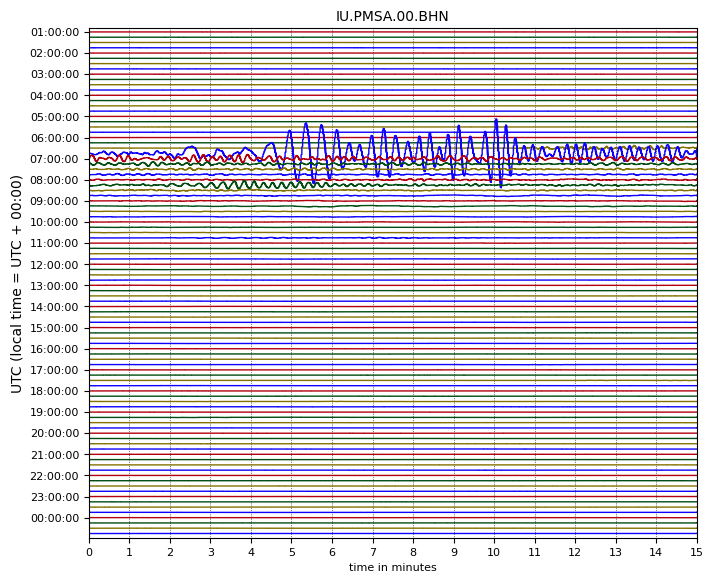

In [ ]:
#Descargemos el día del terremoto del Maule

Dst = client.get_waveforms(
    network="IU",
    station="PMSA",
    location="*",
    channel="BHN",
    starttime=obspy.UTCDateTime("2010-02-27T01:00:00"),
    endtime=obspy.UTCDateTime("2010-02-28T01:00:00"),
    attach_response=True,
)

#Grafiquemos usando "dayplot"
Dst.plot(type='dayplot')


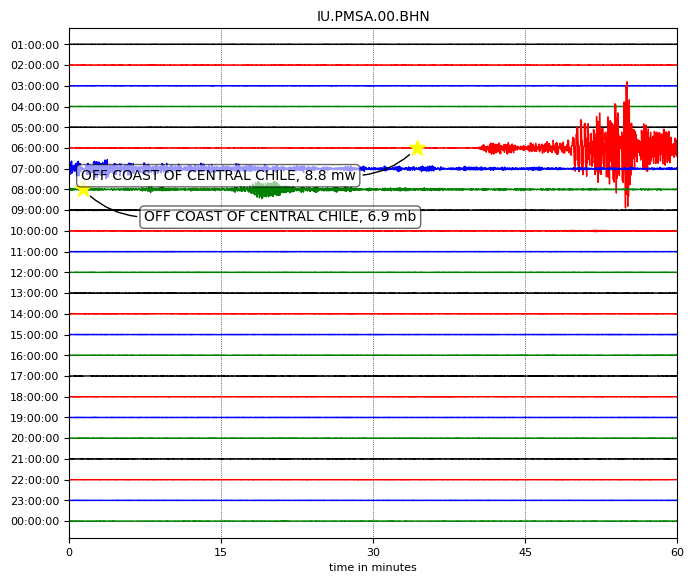

In [ ]:
# Podemos aplicar un filtro (lo veremos en unos minutos) y graficar
Dst.filter("highpass", freq=1, corners=2)

# Como pueden observar podemos customizar el gráfico agregando leyendas y colores

Dst.plot(type="dayplot", interval=60, right_vertical_labels=False,
        vertical_scaling_range=5e3, one_tick_per_line=True,
        color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
        events={'min_magnitude': 6.5})

Si no les gusta usar los graficos que entrega obspy por defecto y prefieren hacer los propios no hay problema, aquí les dejo un ejemplo de grafico usando matplotlib

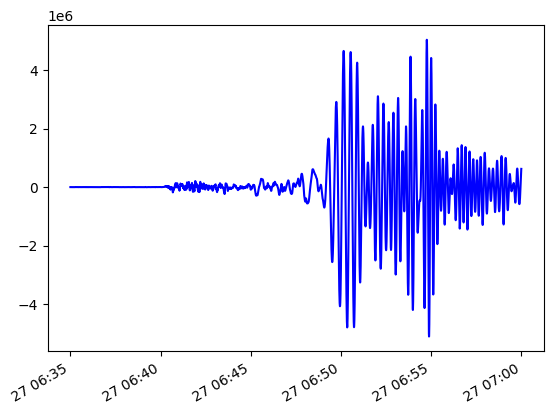

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()
%matplotlib inline